In [3]:
import pandas as pd
import numpy as np
import warnings
import pickle

from sklearn.utils.multiclass import type_of_target
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [4]:
train_data = pd.read_csv("car data.csv")
details = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
car_detail_v3 = pd.read_csv("Car details v3.csv")
train_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
details.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
train_data.shape

(301, 9)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
train_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
train_data[train_data['Transmission']=="Automatic"].head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
12,ciaz,2015,7.50,9.94,15000,Petrol,Dealer,Automatic,0
22,sx4,2011,4.40,8.01,50000,Petrol,Dealer,Automatic,0
40,baleno,2016,5.85,7.87,24524,Petrol,Dealer,Automatic,0
45,ciaz,2014,7.50,12.04,15000,Petrol,Dealer,Automatic,0
49,ciaz,2017,7.75,9.29,37000,Petrol,Dealer,Automatic,0


In [10]:
train_data.groupby(['Fuel_Type'])['Selling_Price','Owner','Year'].agg(np.max)

,Selling_Price,Owner,Year
Fuel_Type,,,
CNG,3.25,0,2015
Diesel,35.00,1,2018
Petrol,19.75,3,2017


In [11]:
train_data['Years_Used'] =  2020-train_data['Year']
train_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_Used
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


In [12]:
train_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Used
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,6.372093
std,2.891554,5.082812,8.644115,38886.883882,0.247915,2.891554
min,2003.000000,0.100000,0.320000,500.000000,0.000000,2.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,4.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,6.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,8.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,17.000000


## let's check selling price with categorical features

##  Fuel type

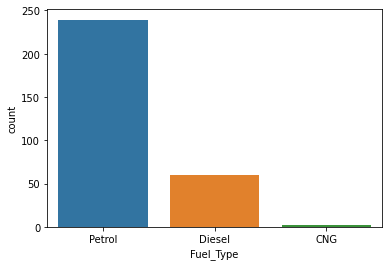

In [13]:
sns.countplot(train_data['Fuel_Type'],data = train_data)
plt.show()

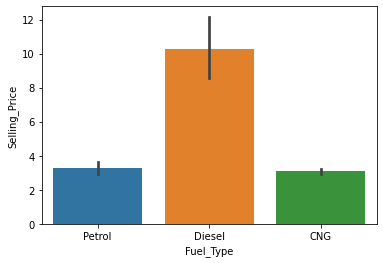

In [14]:
sns.barplot(x = "Fuel_Type",y = "Selling_Price",data = train_data)
plt.show()

##  Seller Type

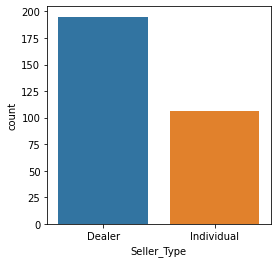

In [15]:
fig =plt.figure(figsize=(4,4))
sns.countplot(train_data['Seller_Type'],data = train_data)
plt.show()

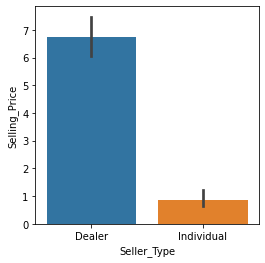

In [16]:
fig =plt.figure(figsize=(4,4))
sns.barplot(x = "Seller_Type",y = "Selling_Price",data = train_data)
plt.show()

## Transmission

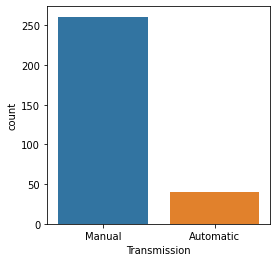

In [17]:
fig =plt.figure(figsize=(4,4))
sns.countplot(train_data['Transmission'],data = train_data)
plt.show()

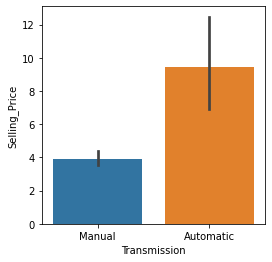

In [18]:
fig =plt.figure(figsize=(4,4))
sns.barplot(x = "Transmission",y = "Selling_Price",data = train_data)
plt.show()

## Owner

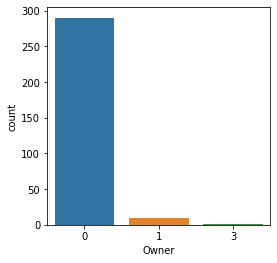

In [19]:
fig =plt.figure(figsize=(4,4))
sns.countplot(train_data['Owner'],data = train_data)
plt.show()

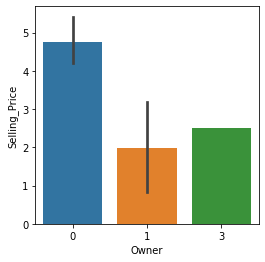

In [20]:
fig =plt.figure(figsize=(4,4))
sns.barplot(x = "Owner",y = "Selling_Price",data = train_data)
plt.show()

# Let's check numerical feature for any oultiers

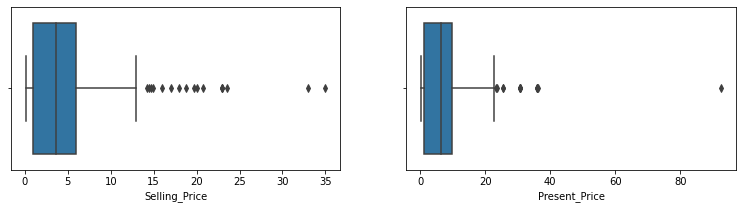

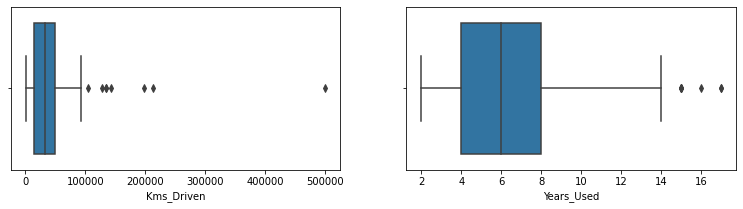

In [21]:
num_cols = ['Selling_Price','Present_Price','Kms_Driven','Years_Used']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=train_data)
    i += 1
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=train_data)
    i += 1
    
    plt.show()

##### There's a very few outliers in every numeric feature 

In [22]:
train_data[train_data['Years_Used'] > train_data['Years_Used'].quantile(0.97)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_Used
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0,17
39,sx4,2003,2.25,7.98,62000,Petrol,Dealer,Manual,0,17
54,innova,2005,2.75,10.21,90000,Petrol,Individual,Manual,0,15
77,corolla,2004,1.50,12.35,135154,Petrol,Dealer,Automatic,0,16
84,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0,15
92,innova,2005,3.51,13.70,75000,Petrol,Dealer,Manual,0,15
189,Hero Super Splendor,2005,0.20,0.57,55000,Petrol,Individual,Manual,0,15


In [23]:
train_data[train_data['Kms_Driven'] > train_data['Kms_Driven'].quantile(0.97)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_Used
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0,17
50,fortuner,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0,8
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0,7
77,corolla,2004,1.50,12.35,135154,Petrol,Dealer,Automatic,0,16
84,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0,15
85,camry,2006,2.50,23.73,142000,Petrol,Individual,Automatic,3,14
179,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0,10
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0,12
200,Bajaj Pulsar 150,2006,0.10,0.75,92233,Petrol,Individual,Manual,0,14


In [24]:
train_data[train_data['Selling_Price'] > train_data['Selling_Price'].quantile(0.98)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_Used
51,fortuner,2015,23.0,30.61,40000,Diesel,Dealer,Automatic,0,5
63,fortuner,2015,23.5,35.96,47000,Diesel,Dealer,Automatic,0,5
64,fortuner,2017,33.0,36.23,6000,Diesel,Dealer,Automatic,0,3
82,innova,2017,23.0,25.39,15000,Diesel,Dealer,Automatic,0,3
86,land cruiser,2010,35.0,92.60,78000,Diesel,Dealer,Manual,0,10
93,fortuner,2015,23.0,30.61,40000,Diesel,Dealer,Automatic,0,5


In [25]:
train_data.pivot_table(values = 'Selling_Price',index = 'Seller_Type',columns = 'Transmission')

Transmission,Automatic,Manual
Seller_Type,,
Dealer,12.246552,5.756506
Individual,1.968182,0.743895


In [26]:
train_data.pivot_table(values = "Selling_Price",index = 'Fuel_Type',columns = 'Transmission')

Transmission,Automatic,Manual
Fuel_Type,,
CNG,NaN,3.100000
Diesel,20.699167,7.673333
Petrol,4.586071,3.088768


<Figure size 720x360 with 0 Axes>

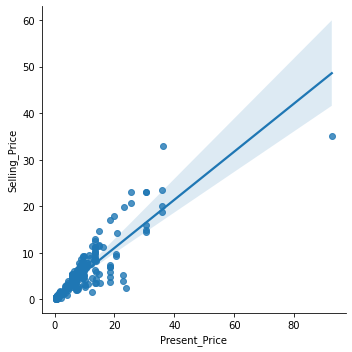

In [27]:
plt.figure(figsize= (10,5))
sns.lmplot(x = 'Present_Price',y = 'Selling_Price',data = train_data)
plt.show()

In [28]:
train_data.corr()['Selling_Price']

Year             0.236141
Selling_Price    1.000000
Present_Price    0.878983
Kms_Driven       0.029187
Owner           -0.088344
Years_Used      -0.236141
Name: Selling_Price, dtype: float64

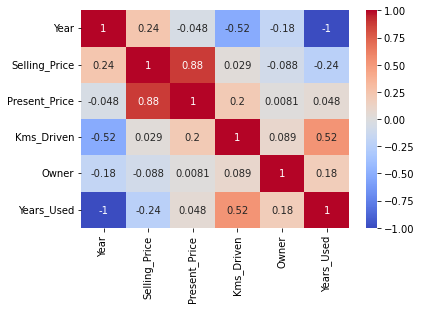

In [29]:
sns.heatmap(train_data.corr(),annot = True,cmap = 'coolwarm')
plt.show()

In [30]:
X = train_data.drop(['Selling_Price'],axis=1)
y = train_data['Selling_Price']

In [31]:
X

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_Used
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...,...
296,city,2016,11.60,33988,Diesel,Dealer,Manual,0,4
297,brio,2015,5.90,60000,Petrol,Dealer,Manual,0,5
298,city,2009,11.00,87934,Petrol,Dealer,Manual,0,11
299,city,2017,12.50,9000,Diesel,Dealer,Manual,0,3


In [32]:
X.drop(['Year'],axis = 1,inplace = True)


In [33]:
X.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [34]:
le = LabelEncoder()
fuel_type = le.fit_transform(X.Fuel_Type)

In [35]:
#CNG=0
#Petrol = 2
#Diesel = 1

In [36]:
X['Fuel_Type_num'] = fuel_type
X.drop(['Fuel_Type'],axis = 1,inplace = True)

In [37]:
le1 = LabelEncoder()
seller_type = le1.fit_transform(X.Seller_Type)

In [38]:
#Dealer = 0
#Individual = 1

In [39]:
X['Seller_Type_num'] = seller_type
X.drop(['Seller_Type'],axis =1,inplace= True)

In [40]:
le3 = LabelEncoder()
transmission = le3.fit_transform(X.Transmission)

In [41]:
#manual = 1
#automatic = 0

In [42]:
X['Transmission_num'] = transmission
X.drop(['Transmission'],axis = 1,inplace = True)

In [43]:
X.drop(['Car_Name'],axis =1,inplace = True)

In [44]:
X

,Present_Price,Kms_Driven,Owner,Years_Used,Fuel_Type_num,Seller_Type_num,Transmission_num
0,5.59,27000,0,6,2,0,1
1,9.54,43000,0,7,1,0,1
2,9.85,6900,0,3,2,0,1
3,4.15,5200,0,9,2,0,1
4,6.87,42450,0,6,1,0,1
...,...,...,...,...,...,...,...
296,11.60,33988,0,4,1,0,1
297,5.90,60000,0,5,2,0,1
298,11.00,87934,0,11,2,0,1
299,12.50,9000,0,3,1,0,1


In [45]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)


ExtraTreesRegressor()

In [46]:
print(model.feature_importances_)

[4.31063622e-01 4.01424301e-02 2.46738296e-04 8.09363108e-02
 1.33058560e-01 2.41599462e-01 7.29528772e-02]


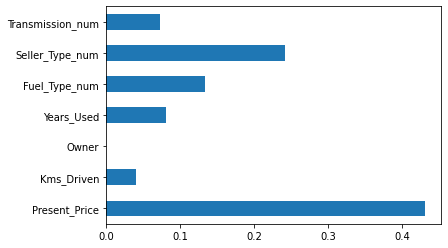

In [47]:
imop_feature = pd.Series(model.feature_importances_,index= X.columns)
imop_feature.plot(kind='barh')
plt.show()

In [48]:
#X.drop(['Owner'],axis=1,inplace=True)

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1,test_size = 0.2)

In [50]:
print("train model size: ", X_train.shape)
print("train test size: ", y_train.shape)
print("test model size: ", X_test.shape)
print("test predict size: ", y_test.shape)


train model size:  (240, 7)
train test size:  (240,)
test model size:  (61, 7)
test predict size:  (61,)


## Model for training

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
model = RandomForestRegressor()

In [52]:
n_estimators = [int(x) for x in np.linspace(100,1200,12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [53]:
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [54]:
rf = RandomForestRegressor()

In [55]:
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,scoring = 'neg_mean_squared_error',n_iter =10,cv=5,random_state = 2021,verbose = 2,n_jobs = 1)

In [56]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   1.3s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   1.3s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estima

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=2021, scoring='neg_mean_squared_error',
                   verbose=2)

In [57]:
prediction= rf_random.predict(X_test)

In [58]:
prediction

array([ 6.74222929,  2.90633506,  0.55810197,  2.97699861,  1.07719189,
        5.32648972,  0.76315131,  3.1237063 ,  9.73984317,  0.59398841,
        8.04819779,  3.77620063,  5.28158148,  4.26328735,  0.20920365,
        0.38653288,  7.48559072,  5.27020587,  5.23095302,  7.48559072,
        5.14271456,  3.63089318, 10.71502693,  7.65040312, 15.74253795,
        3.23986197,  3.31668665,  0.62559553,  0.26776668,  0.46109843,
        0.30047356,  0.25089235,  5.15391498, 22.66534689, 20.73117716,
        4.2245917 ,  3.49364933,  0.85608089,  0.30388406,  4.06469377,
        9.78202521, 10.46049336,  0.30840618,  4.33526459,  4.30349952,
        4.56784967,  6.07506669,  7.50820131,  7.8505546 ,  1.17389295,
        4.80112529,  0.44510255,  2.89579468,  4.38627462,  1.17108573,
        0.20378852, 22.42888526,  0.64385801,  5.98028286,  5.90991939,
        0.27768083])

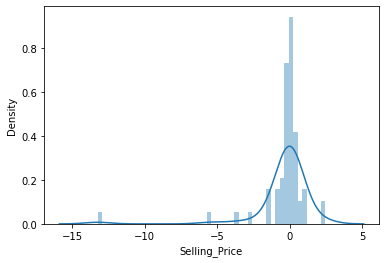

In [59]:
sns.distplot(y_test-prediction)
plt.show()

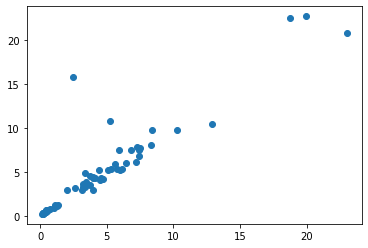

In [60]:
plt.scatter(y_test,prediction)
plt.show()

In [61]:
from sklearn import metrics

In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.8195829528160192
MSE: 4.147098309221461
RMSE: 2.036442562220074


In [63]:
file = open('Random_forest_regression_model.pkl','wb')
pickle.dump(rf_random,file)